In [193]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
import collections
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense,BatchNormalization
from keras.models import Sequential

## Reading the Dataset and the Label information

In [185]:
# Reading data
data=pd.read_pickle("D:\\New folder\\data0.pickle")
X_test=data['x_test']
X_valid=data['x_validation']
y_test=data['y_test']
y_valid=data['y_validation']
X_train=data['x_train']
y_train=data['y_train']

# Storing Label data
d=pd.read_csv("D:\\New folder\\label_names.csv")
labels={}
for i in d['ClassId']:
    labels[i]=d['SignName'][i]

## One Hot Encode all the Target variables

In [186]:
# One hot encoding the targets
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_valid=np_utils.to_categorical(y_valid)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("y_valid:",y_valid.shape)

y_train: (86989, 43)
y_test: (12630, 43)
y_valid: (4410, 43)


## Converting the Pixels into Valid Picture Pixels

In [187]:
# Converting the dataset into valid image arrays
X_train=np.transpose(X_train,axes=[0,2,3,1])
print("X_train:",X_train.shape)

X_test=np.transpose(X_test,axes=[0,2,3,1])
X_test=np.divide(X_test,255.)
print("X_test:",X_test.shape)

X_valid=np.transpose(X_valid,axes=[0,2,3,1])
X_valid=np.divide(X_valid,255.)
print("X_valid:",X_valid.shape)

X_train: (86989, 32, 32, 3)
X_test: (12630, 32, 32, 3)
X_valid: (4410, 32, 32, 3)


## Plotting some signs from all the Datasets

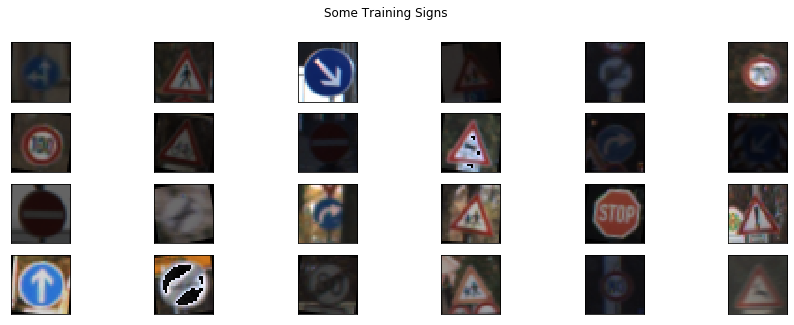

In [132]:
# Plot training signals
fig = plt.figure(figsize=(15,5))
fig.suptitle("Some Training Signs")
for i in range(24):
    ax = fig.add_subplot(4,6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

plt.show()

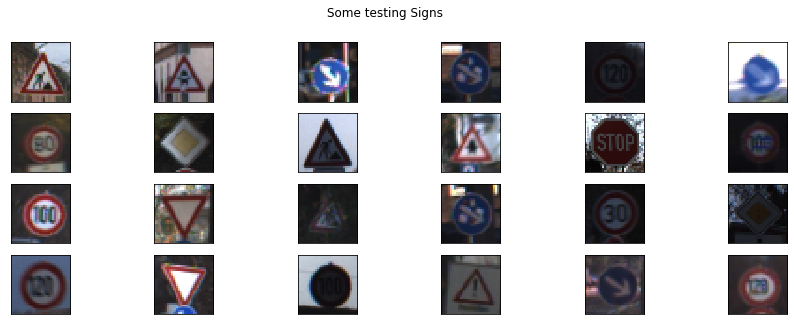

In [133]:
# Plot testing signals
fig = plt.figure(figsize=(15,5))
fig.suptitle("Some testing Signs")
for i in range(24):
    ax = fig.add_subplot(4,6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i])

plt.show()

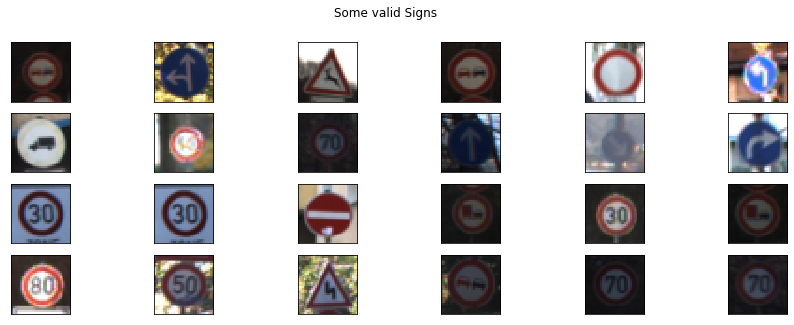

In [134]:
# Plot valid signals
fig = plt.figure(figsize=(15,5))
fig.suptitle("Some valid Signs")
for i in range(24):
    ax = fig.add_subplot(4,6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_valid[i])

plt.show()

## Barcharts for all the Signals in all the datasets

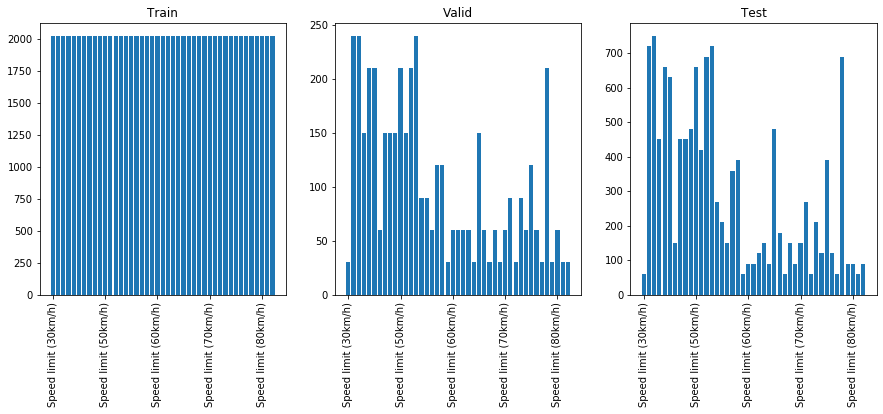

In [194]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
w=collections.Counter(data['y_train'])
axs[0].bar(w.keys(), w.values())
axs[0].set_title('Train')

w=collections.Counter(data['y_validation'])
axs[1].bar(w.keys(), w.values())
axs[1].set_title('Valid')

w=collections.Counter(data['y_test'])
axs[2].bar(w.keys(), w.values())
axs[2].set_title('Test')

for i in range(3):
    axs[i].set_xticklabels(labels.values())
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)  

## Define Model

In [39]:
# Model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(32,32, 3)))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=3))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(43, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
flatten_7 (Flatten)          (None, 65536)            

## Compile and training the model

In [40]:
# Compiling the CNN
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
# train
history = model.fit(X_train, y_train,validation_data=(X_valid,y_valid),epochs=2,batch_size=32)

Train on 86989 samples, validate on 4410 samples
Epoch 1/2
86989/86989 [==============================] - 1396s 16ms/step - loss: 0.1986 - accuracy: 0.9509 - val_loss: 0.1984 - val_accuracy: 0.9499
Epoch 2/2
86989/86989 [==============================] - 1386s 16ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.1393 - val_accuracy: 0.9637


## Evaluating the model

In [42]:
# Evaluating the model
score = model.evaluate(X_test,y_test,verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9496437311172485


## Plotting some misclassified signals

In [184]:
# Get predicted probabilities for test dataset
y_probs = model.predict(X_test)

# Get predicted labels for test dataset
y_pred = np.argmax(y_probs, axis=1)

# index of misclassified signals
mis=np.where(y_pred != data['y_test'])[0][:9]

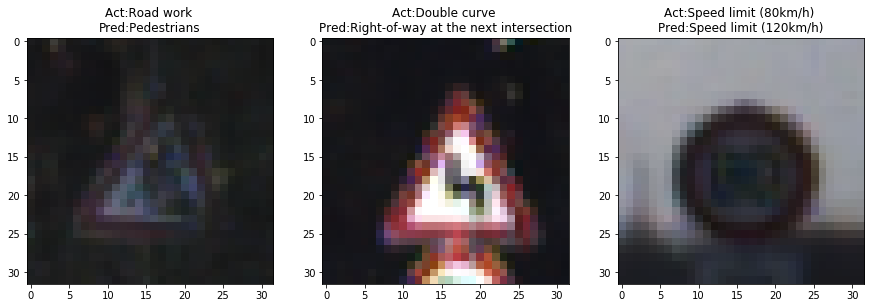

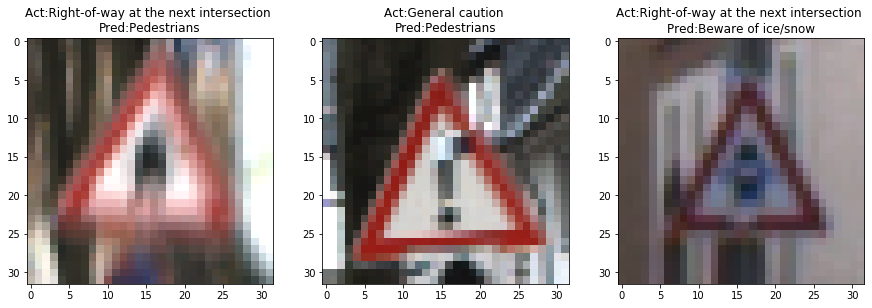

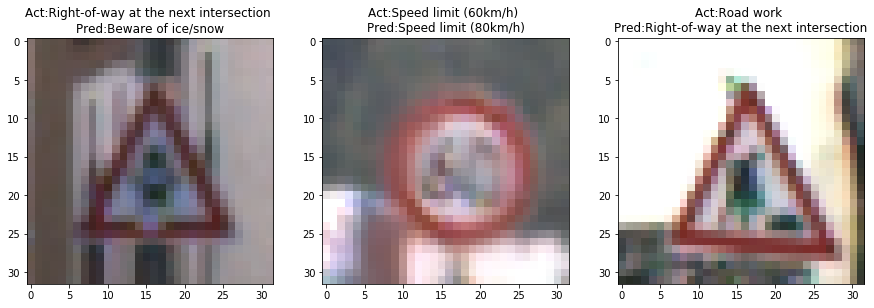

In [190]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].imshow(X_test[mis[i]])
    axs[i].set_title("Act:{} \nPred:{}".format(labels[data['y_test'][mis[i]]], labels[y_pred[mis[i]]]))
   
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].imshow(X_test[mis[i+3]])
    axs[i].set_title("Act:{} \nPred:{}".format(labels[data['y_test'][mis[i+3]]], labels[y_pred[mis[i+3]]]))

fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    axs[i].imshow(X_test[mis[i+6]])
    axs[i].set_title("Act:{} \nPred:{}".format(labels[data['y_test'][mis[i+6]]], labels[y_pred[mis[i+6]]]))